In [171]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
from scipy.stats import f_oneway
import statsmodels.api as sm

In [172]:
# load report
result_path = "./report/result2015.pkl"
with open(result_path, "rb") as f:
    result = pickle.load(f)

In [173]:
len(result.keys())
clf_names = ["rf", "svm", 'lda', 'cnn']
pretrain_counts = [0, 1, 3, 10, 30]
train_counts = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]


In [174]:
df_f1 = pd.DataFrame()
for clf in clf_names:
    for pretrain in pretrain_counts:
        column_id = f"{clf}_{pretrain}"
        f1 = []
        for train in train_counts:
            if (pretrain == 0) and (train == 0):
                f1.append(np.nan)
                continue
            report_id = f"{clf}_{pretrain}_{train}"
            f1.append(result[report_id]["f1"])
        df_f1[column_id] = f1
df_f1.index = train_counts

In [175]:
df_f1

,rf_0,rf_1,rf_3,rf_10,rf_30,svm_0,svm_1,svm_3,svm_10,svm_30,lda_0,lda_1,lda_3,lda_10,lda_30,cnn_0,cnn_1,cnn_3,cnn_10,cnn_30
0,NaN,0.553334,0.570672,0.572531,0.576595,NaN,0.543290,0.587899,0.595780,0.595389,NaN,0.644042,0.656475,0.650228,0.651476,NaN,0.548563,0.419299,0.572362,0.576302
100,0.528349,0.554497,0.569889,0.574202,0.574240,0.582774,0.559361,0.604060,0.607985,0.608959,0.659069,0.646222,0.644174,0.651651,0.649000,0.546933,0.551561,0.452216,0.576426,0.573419
200,0.526856,0.557759,0.570827,0.571582,0.579474,0.604364,0.564489,0.603354,0.613974,0.616288,0.659069,0.649160,0.659834,0.643042,0.655582,0.559469,0.546154,0.323953,0.568264,0.578460
300,0.529113,0.553741,0.572443,0.573887,0.579920,0.615390,0.578717,0.608673,0.618245,0.627129,0.659069,0.648448,0.663758,0.647771,0.652721,0.569479,0.560535,0.340452,0.574694,0.577005
400,0.526862,0.555047,0.571775,0.574421,0.577950,0.623703,0.581823,0.620534,0.623825,0.618134,0.659069,0.645646,0.659627,0.653260,0.649011,0.577060,0.575380,0.522921,0.582174,0.584202
500,0.525523,0.553335,0.568994,0.573997,0.575872,0.638173,0.591965,0.619453,0.626371,0.630174,0.659069,0.646959,0.651726,0.653433,0.654251,0.588666,0.572314,0.435065,0.593388,0.580256
600,0.527159,0.557396,0.570165,0.569464,0.575081,0.652074,0.608119,0.636353,0.633362,0.642982,0.659069,0.650731,0.656808,0.655159,0.644606,0.592961,0.576989,0.526076,0.586013,0.580732
700,0.525310,0.555793,0.570886,0.574370,0.577226,0.658872,0.611582,0.640994,0.645209,0.647767,0.659069,0.654847,0.651555,0.654761,0.651766,0.595012,0.573508,0.504859,0.583577,0.573574
800,0.531861,0.552337,0.572300,0.574326,0.580821,0.665976,0.616900,0.645339,0.650578,0.650224,0.659069,0.651649,0.656505,0.655660,0.641232,0.597887,0.574003,0.455168,0.583226,0.576757
900,0.525658,0.552976,0.571640,0.574256,0.580432,0.672122,0.627223,0.657977,0.658135,0.665849,0.659069,0.647025,0.651681,0.652572,0.653183,0.615151,0.576810,0.422773,0.586198,0.582532


In [176]:
baseline_f1_allP = 0.16*2 / (1+1.16)
print(baseline_f1_allP)

0.14814814814814814


In [177]:
def plot_f1(clf_name, subp, clf_fullname):
    for pretrain in pretrain_counts:
        subp.plot(df_f1[f"{clf_name}_{pretrain}"], label=f"{clf_name}_{pretrain}")
    subp.set_ylim(0.42, 0.68)
    subp.legend()
    subp.set_title(clf_fullname)
    subp.set_xlabel("# of epochs trained before test", fontsize=8, x=0.8)
    subp.set_ylabel("f1 score", fontsize=8)

Text(0.5, 0.98, 'F1 score of different classifiers')

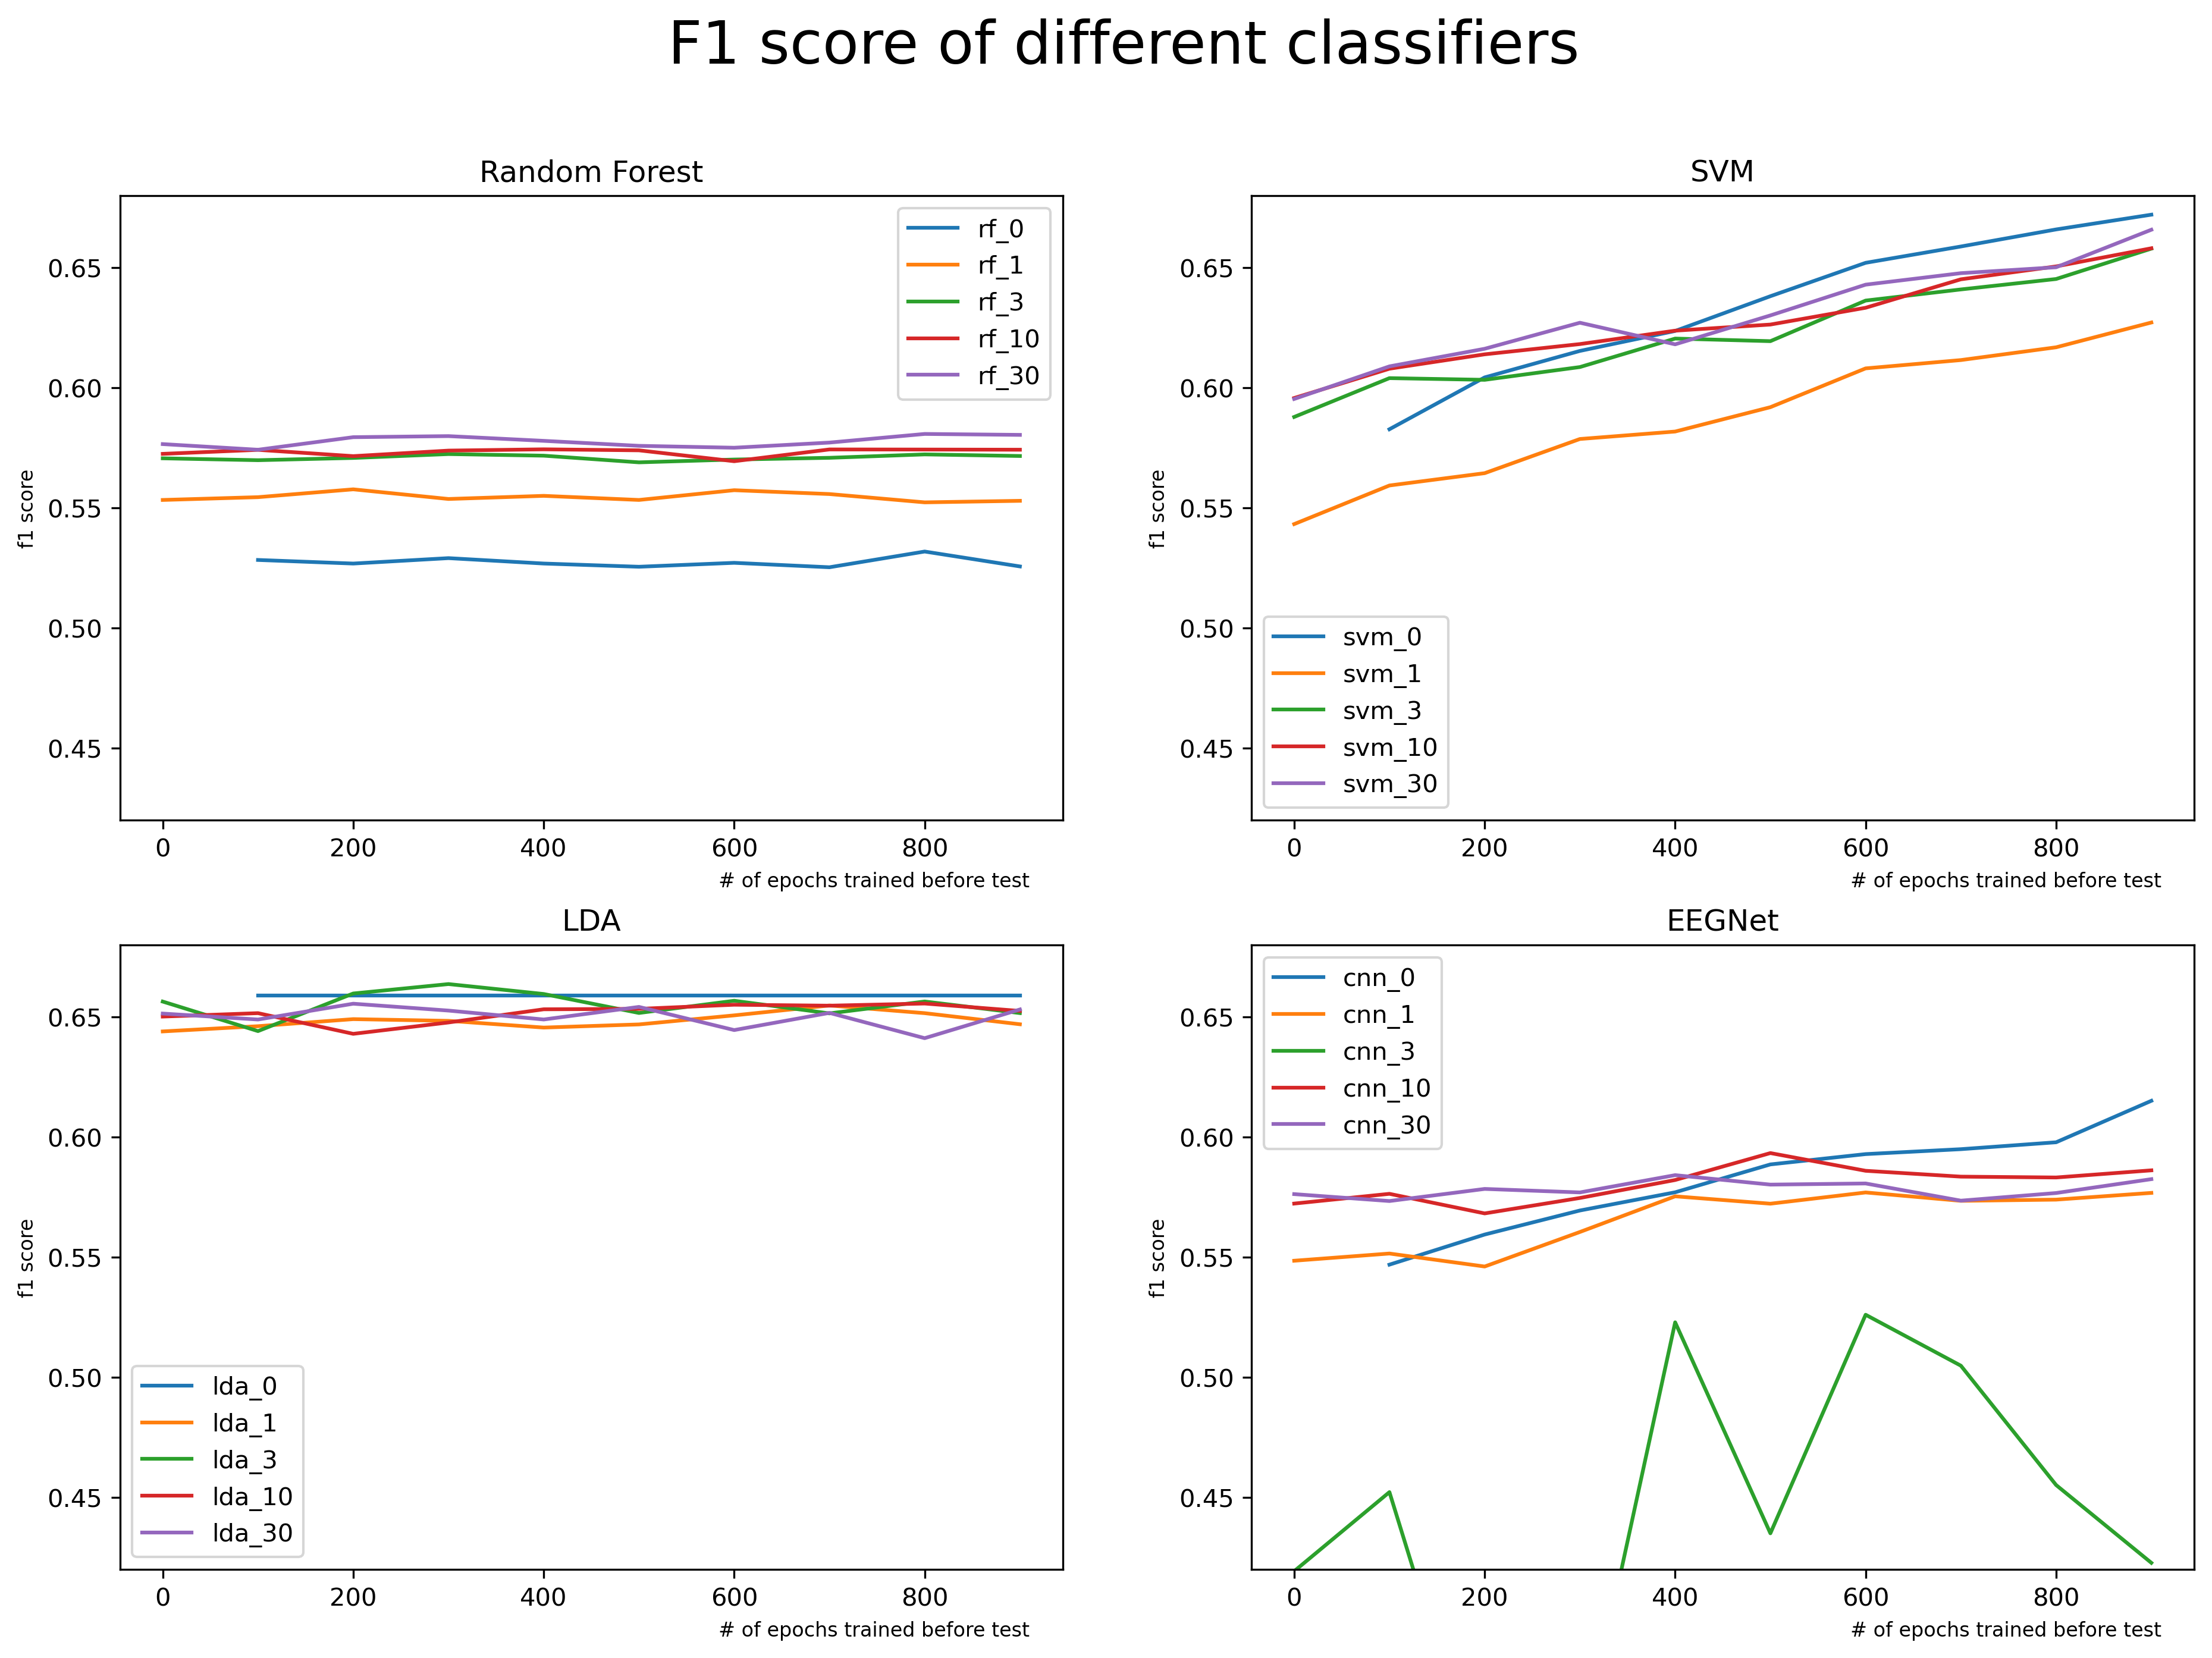

In [178]:
figure, axis = plt.subplots(2, 2)
plot_f1("rf", axis[0, 0], "Random Forest")
plot_f1("svm", axis[0, 1], "SVM")
plot_f1("lda", axis[1, 0], "LDA")
plot_f1("cnn", axis[1, 1], "EEGNet")
figure.set_dpi(300)
figure.set_size_inches(15, 10)
# set title
figure.suptitle("F1 score of different classifiers", fontsize=24)

In [179]:
df_acc = pd.DataFrame()
for clf in clf_names:
    for pretrain in pretrain_counts:
        column_id = f"{clf}_{pretrain}"
        acc = []
        for train in train_counts:
            if (pretrain == 0) and (train == 0):
                acc.append(np.nan)
                continue
            report_id = f"{clf}_{pretrain}_{train}"
            acc.append(result[report_id]["acc"])
        df_acc[column_id] = acc
df_acc.index = train_counts

In [180]:
df_acc

,rf_0,rf_1,rf_3,rf_10,rf_30,svm_0,svm_1,svm_3,svm_10,svm_30,lda_0,lda_1,lda_3,lda_10,lda_30,cnn_0,cnn_1,cnn_3,cnn_10,cnn_30
0,NaN,0.708965,0.752255,0.761183,0.748737,NaN,0.675866,0.728084,0.716721,0.723575,NaN,0.835317,0.843074,0.840639,0.841811,NaN,0.777958,0.455357,0.795364,0.790133
100,0.807810,0.707973,0.753066,0.761454,0.746753,0.770473,0.696068,0.731962,0.730159,0.734758,0.826659,0.835859,0.839827,0.840639,0.839286,0.739087,0.765693,0.510281,0.792208,0.786797
200,0.807991,0.706620,0.755682,0.760191,0.751172,0.771465,0.694535,0.731241,0.734398,0.742334,0.826659,0.834867,0.843254,0.838745,0.842803,0.733045,0.768218,0.325848,0.793741,0.788510
300,0.807991,0.709325,0.753427,0.759650,0.751533,0.762266,0.703644,0.731421,0.737644,0.745942,0.826659,0.837031,0.845418,0.840458,0.843164,0.732594,0.777507,0.344246,0.792839,0.786436
400,0.806548,0.708333,0.754149,0.763618,0.749008,0.757756,0.710137,0.743777,0.741252,0.737915,0.826659,0.835498,0.841270,0.842713,0.840458,0.740891,0.775343,0.643398,0.798701,0.792929
500,0.807449,0.704996,0.753517,0.759560,0.748016,0.771194,0.710768,0.740170,0.742063,0.747565,0.826659,0.836760,0.841089,0.838564,0.840819,0.757846,0.778139,0.475108,0.794192,0.785263
600,0.805556,0.708424,0.753427,0.759109,0.747204,0.778770,0.736201,0.754870,0.749369,0.764881,0.826659,0.837121,0.841360,0.840188,0.838835,0.738185,0.780934,0.655483,0.793831,0.788690
700,0.806638,0.706620,0.751623,0.761905,0.748918,0.780213,0.727183,0.757666,0.758658,0.763618,0.826659,0.840819,0.840548,0.840368,0.842082,0.752435,0.773719,0.589376,0.802579,0.784001
800,0.807359,0.705988,0.754149,0.760913,0.750812,0.781295,0.733496,0.757125,0.763167,0.766865,0.826659,0.836129,0.841811,0.839556,0.840909,0.754509,0.779762,0.508929,0.789683,0.784542
900,0.806187,0.708874,0.753517,0.760823,0.751353,0.784452,0.744228,0.772817,0.764610,0.771916,0.826659,0.835859,0.841811,0.842262,0.842262,0.767136,0.771465,0.451209,0.799513,0.791937


In [181]:
def plot_acc(clf_name, subp, clf_fullname):
    for pretrain in pretrain_counts:
        subp.plot(df_acc[f"{clf_name}_{pretrain}"], label=f"{clf_name}_{pretrain}")
    subp.set_ylim(0.6, 0.87)
    subp.legend()
    subp.set_title(clf_fullname)
    subp.set_xlabel("# of epochs trained before test", fontsize=8, x=0.8)
    subp.set_ylabel("accuracy", fontsize=8)

Text(0.5, 0.98, 'Accuracy of different classifiers')

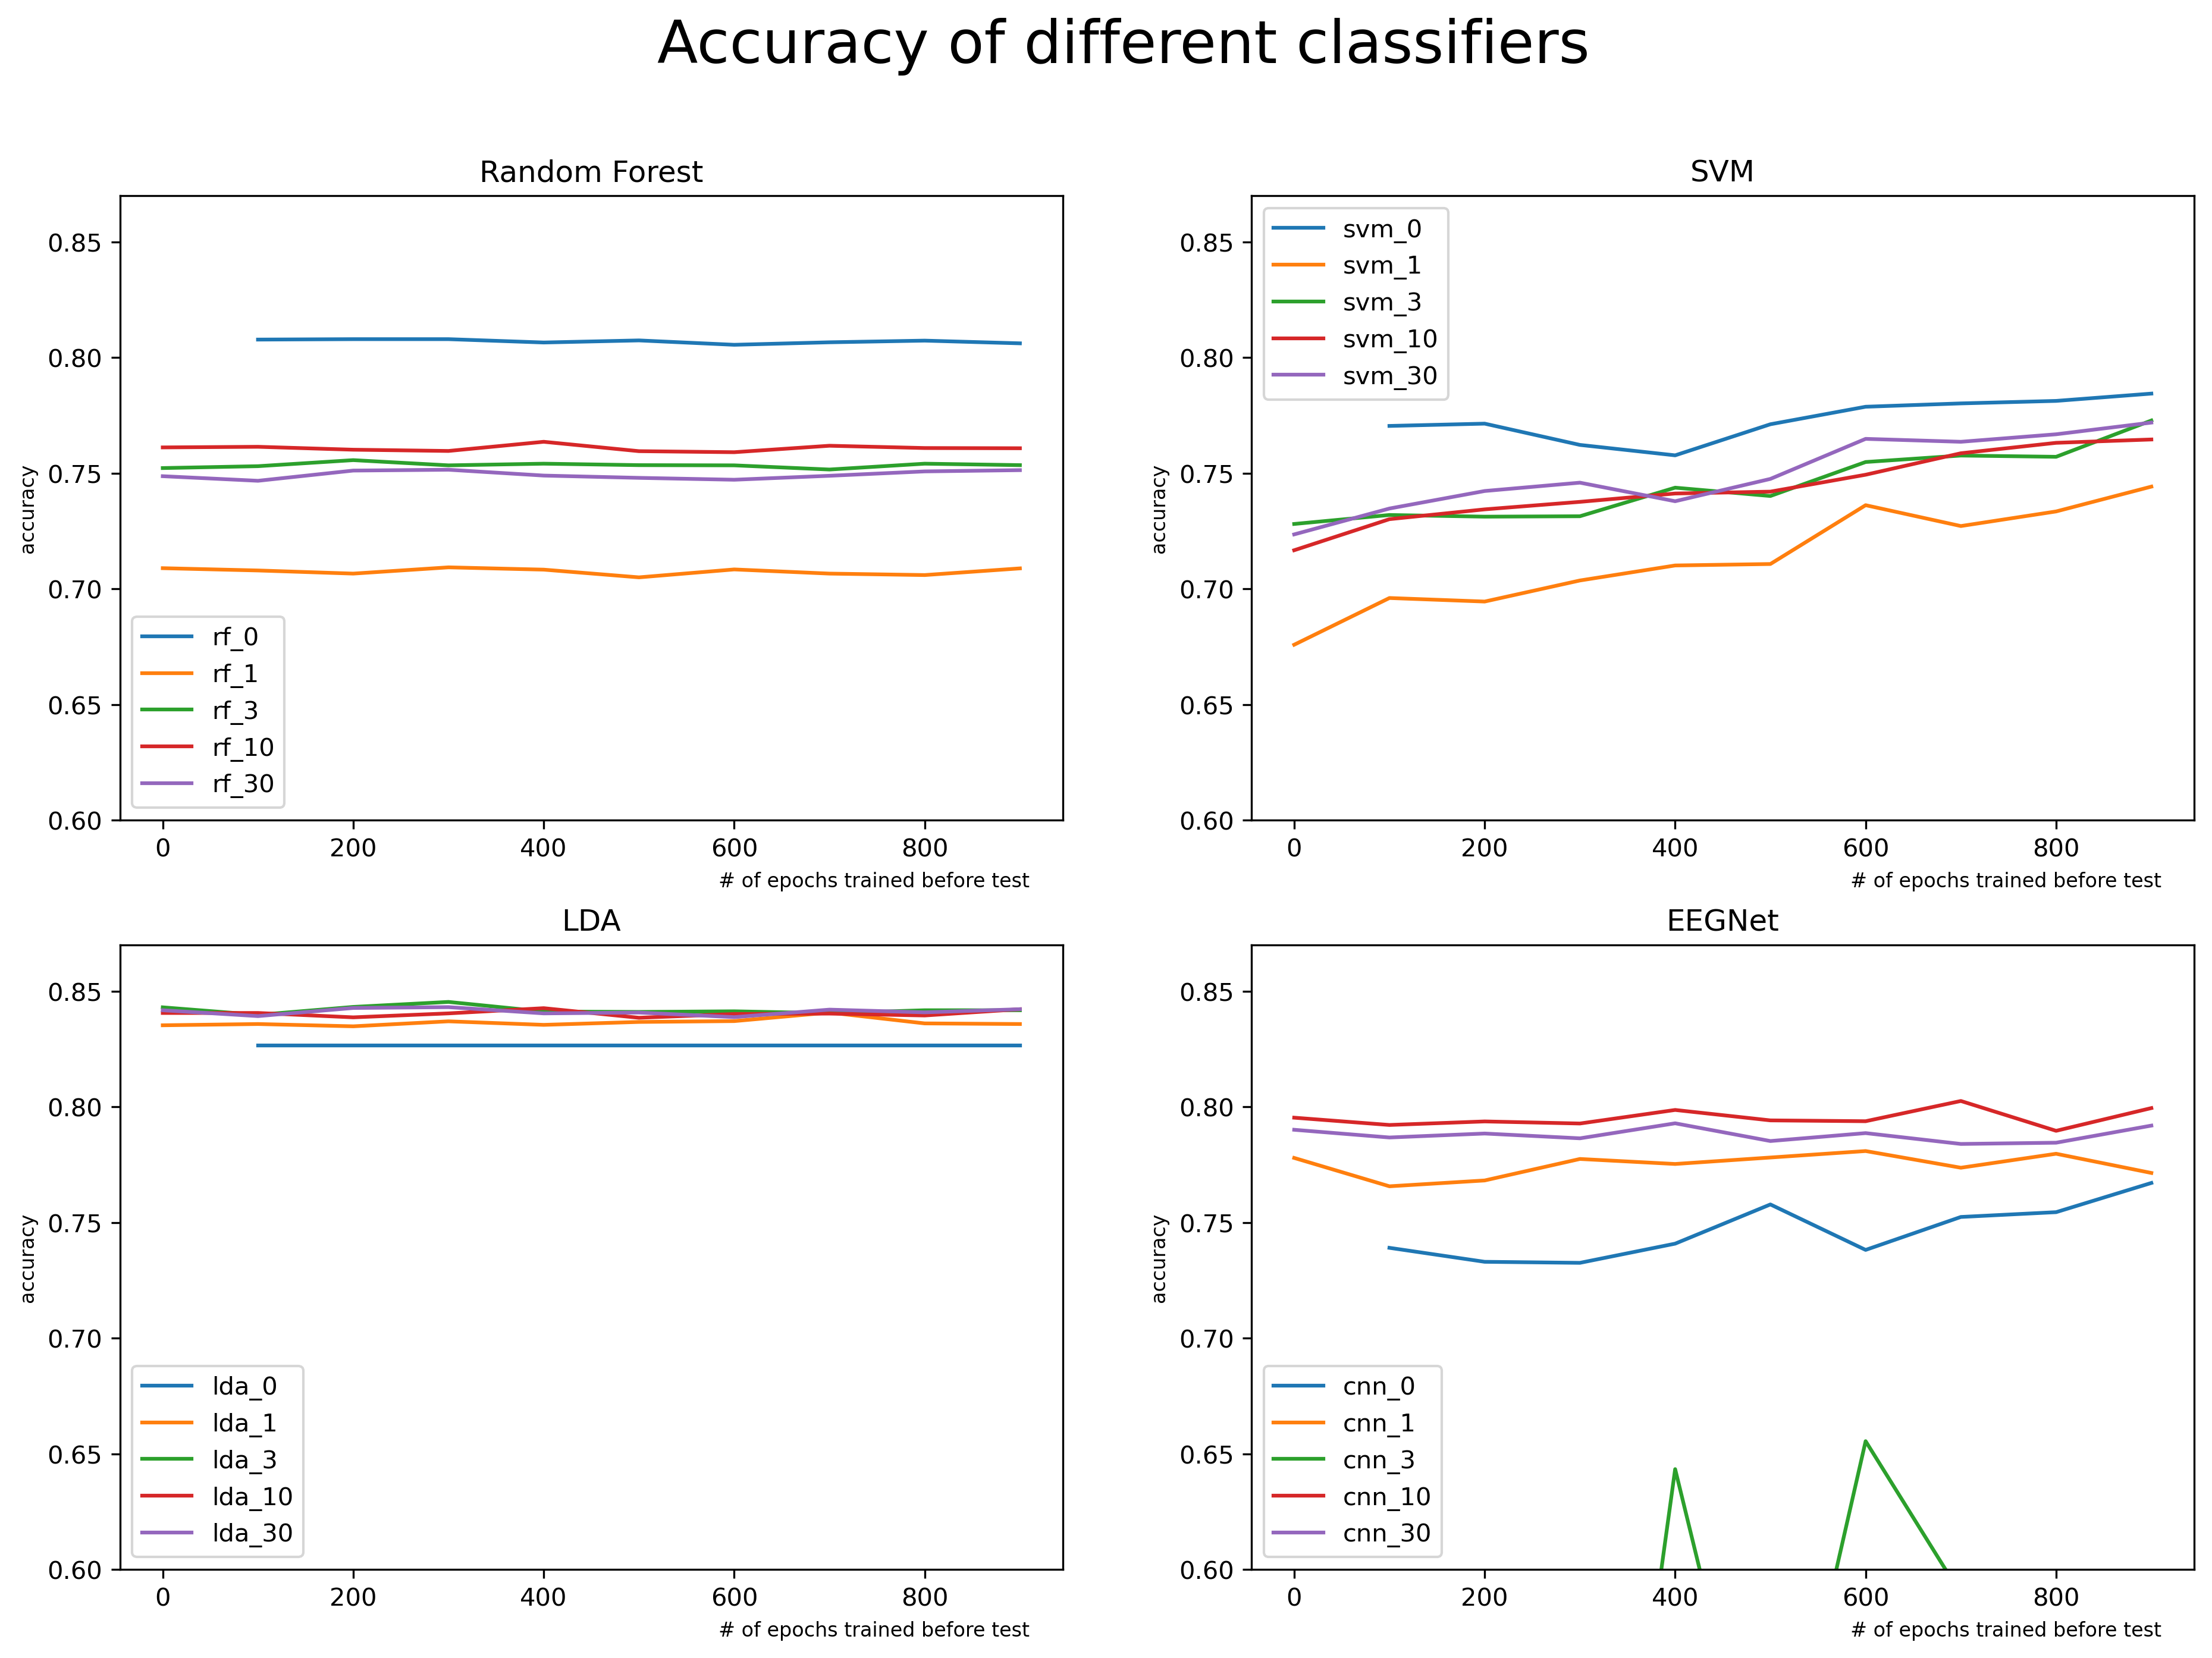

In [182]:
figure, axis = plt.subplots(2, 2)
plot_acc("rf", axis[0, 0], "Random Forest")
plot_acc("svm", axis[0, 1], "SVM")
plot_acc("lda", axis[1, 0], "LDA")
plot_acc("cnn", axis[1, 1], "EEGNet")
figure.set_dpi(300)
figure.set_size_inches(15, 10)
# set title
figure.suptitle("Accuracy of different classifiers", fontsize=24)

# ANOVA for each classifier

In [183]:
rf_df = pd.DataFrame(columns=["f1", "pretrain", "train"])
clf_name = "rf"
for pc in pretrain_counts:
    for tc in train_counts:
        if tc == 0 and pc == 0:
            continue
        rf_df = pd.concat([rf_df, pd.DataFrame({
            'f1': [result[f"{clf_name}_{pc}_{tc}"]["f1"]],
            'pretrain': [pc],
            'train': [tc]
        })])
#rf_df = pd.concat([rf_df, rf_df])
rf_df.reset_index(drop=True, inplace=True)
rf_df

,f1,pretrain,train
0,0.528349,0,100
1,0.526856,0,200
2,0.529113,0,300
3,0.526862,0,400
4,0.525523,0,500
5,0.527159,0,600
6,0.525310,0,700
7,0.531861,0,800
8,0.525658,0,900
9,0.553334,1,0


In [184]:
#formula = 'f1 ~ C(pretrain) + C(train) + C(pretrain):C(train)'
formula = 'f1 ~ C(pretrain)'
model = ols(formula, rf_df).fit()
sm.stats.anova_lm = anova_lm(model, typ=2)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     f1   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1160.
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           5.80e-44
Time:                        11:21:19   Log-Likelihood:                 241.46
No. Observations:                  49   AIC:                            -472.9
Df Residuals:                      44   BIC:                            -463.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.5274      0.00

In [185]:
svm_df = pd.DataFrame(columns=["f1", "pretrain", "train"])
for pc in pretrain_counts:
    for tc in train_counts:
        if tc == 0 and pc == 0:
            continue
        svm_df = pd.concat([svm_df, pd.DataFrame({
            'f1': [result[f"svm_{pc}_{tc}"]["f1"]],
            'pretrain': [pc],
            'train': [tc]
        })])
svm_df.reset_index(drop=True, inplace=True)
formula = 'f1 ~ C(pretrain)'
model = ols(formula, svm_df).fit()
sm.stats.anova_lm = anova_lm(model, typ=2)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     f1   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     5.710
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           0.000862
Time:                        11:21:19   Log-Likelihood:                 114.96
No. Observations:                  49   AIC:                            -219.9
Df Residuals:                      44   BIC:                            -210.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.6348      0.00

In [186]:
lda_df = pd.DataFrame(columns=["f1", "pretrain", "train"])
for pc in pretrain_counts:
    for tc in train_counts:
        if tc == 0 and pc == 0:
            continue
        lda_df = pd.concat([lda_df, pd.DataFrame({
            'f1': [result[f"lda_{pc}_{tc}"]["f1"]],
            'pretrain': [pc],
            'train': [tc]
        })])
lda_df.reset_index(drop=True, inplace=True)
formula = 'f1 ~ C(pretrain)'
model = ols(formula, lda_df).fit()
sm.stats.anova_lm = anova_lm(model, typ=2)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     f1   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     10.77
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           3.57e-06
Time:                        11:21:19   Log-Likelihood:                 204.23
No. Observations:                  49   AIC:                            -398.5
Df Residuals:                      44   BIC:                            -389.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.6591      0.00

In [187]:
cnn_df = pd.DataFrame(columns=["f1", "pretrain", "train"])
for pc in pretrain_counts:
    for tc in train_counts:
        if tc == 0 and pc == 0:
            continue
        cnn_df = pd.concat([cnn_df, pd.DataFrame({
            'f1': [result[f"cnn_{pc}_{tc}"]["f1"]],
            'pretrain': [pc],
            'train': [tc]
        })])
cnn_df.reset_index(drop=True, inplace=True)
formula = 'f1 ~ C(pretrain)'
model = ols(formula, cnn_df).fit()
sm.stats.anova_lm = anova_lm(model, typ=2)

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     f1   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     33.84
Date:                Wed, 22 Mar 2023   Prob (F-statistic):           6.60e-13
Time:                        11:21:20   Log-Likelihood:                 99.888
No. Observations:                  49   AIC:                            -189.8
Df Residuals:                      44   BIC:                            -180.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.5825      0.01

In [188]:
F, p = f_oneway(rf_df.loc[rf_df["pretrain"] == 0, "f1"], 
                rf_df.loc[rf_df["pretrain"] == 1, "f1"], 
                rf_df.loc[rf_df["pretrain"] == 3, "f1"], 
                rf_df.loc[rf_df["pretrain"] == 10, "f1"], 
                rf_df.loc[rf_df["pretrain"] == 30, "f1"],)
print("pretrain p: ", p)
F, p = f_oneway(rf_df.loc[(rf_df["train"] <= 300) , "f1"], 
                rf_df.loc[(rf_df["train"] >= 400) & (rf_df["train"] <= 600) , "f1"], 
                rf_df.loc[(rf_df["train"] >= 600), "f1"])
print("train p: ", p)

pretrain p:  5.800244398136267e-44
train p:  0.9249308357013118


In [189]:
F, p = f_oneway(svm_df.loc[svm_df["pretrain"] == 0, "f1"], 
                svm_df.loc[svm_df["pretrain"] == 1, "f1"], 
                svm_df.loc[svm_df["pretrain"] == 3, "f1"], 
                svm_df.loc[svm_df["pretrain"] == 10, "f1"], 
                svm_df.loc[svm_df["pretrain"] == 30, "f1"],)
print("pretrain p: ", p)
F, p = f_oneway(svm_df.loc[(svm_df["train"] <= 300) , "f1"], 
                svm_df.loc[(svm_df["train"] >= 400) & (svm_df["train"] <= 600) , "f1"], 
                svm_df.loc[(svm_df["train"] >= 600), "f1"])
print("train p: ", p)

pretrain p:  0.000862439848337837
train p:  4.227201812154168e-09


In [190]:
F, p = f_oneway(lda_df.loc[lda_df["pretrain"] == 0, "f1"], 
                lda_df.loc[lda_df["pretrain"] == 1, "f1"], 
                lda_df.loc[lda_df["pretrain"] == 3, "f1"], 
                lda_df.loc[lda_df["pretrain"] == 10, "f1"], 
                lda_df.loc[lda_df["pretrain"] == 30, "f1"],)
print("pretrain p: ", p)
F, p = f_oneway(lda_df.loc[(lda_df["train"] <= 300) , "f1"], 
                lda_df.loc[(lda_df["train"] >= 400) & (lda_df["train"] <= 600) , "f1"], 
                lda_df.loc[(lda_df["train"] >= 600), "f1"])
print("train p: ", p)


pretrain p:  3.5694161663896107e-06
train p:  0.7654802918394907


In [191]:
F, p = f_oneway(cnn_df.loc[cnn_df["pretrain"] == 0, "f1"], 
                cnn_df.loc[cnn_df["pretrain"] == 1, "f1"], 
                cnn_df.loc[cnn_df["pretrain"] == 3, "f1"], 
                cnn_df.loc[cnn_df["pretrain"] == 10, "f1"], 
                cnn_df.loc[cnn_df["pretrain"] == 30, "f1"],)
print("pretrain p: ", p)
F, p = f_oneway(cnn_df.loc[(cnn_df["train"] <= 300) , "f1"], 
                cnn_df.loc[(cnn_df["train"] >= 400) & (cnn_df["train"] <= 600) , "f1"], 
                cnn_df.loc[(cnn_df["train"] >= 600), "f1"])
print("train p: ", p)


pretrain p:  6.600447818905787e-13
train p:  0.1127420570286929
